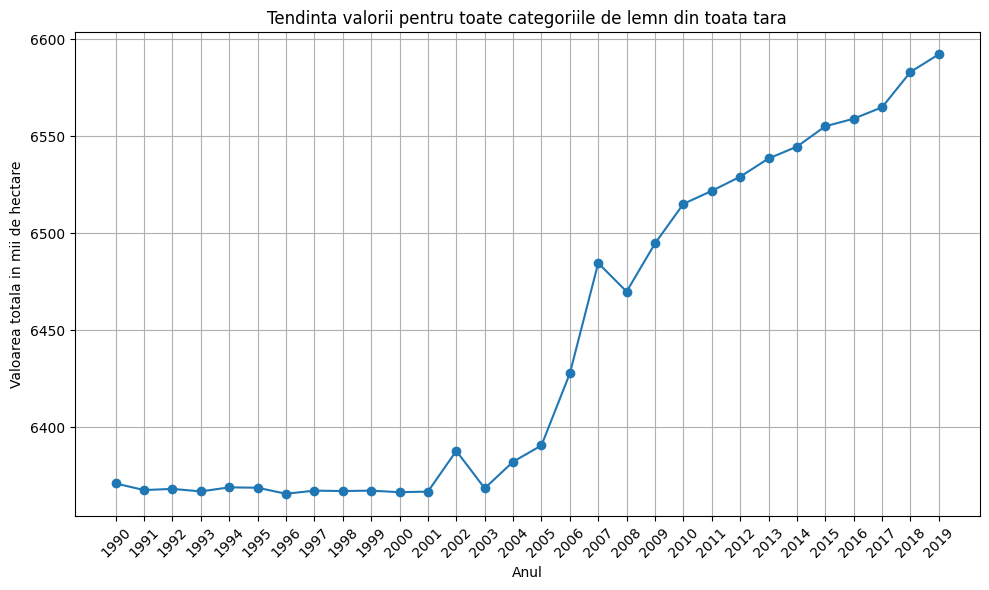

Diferenta de valoare dintre primul an si ultimul an 221.19999999999982


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

dtype_dict = {
    'Category': str,    
    'Region': str,
    'Year': int,
    'Value': float
}

data = pd.read_csv('modified_dataset.csv',skiprows=1, header=None, names=['Category', 'Region', 'Year','Value'])

filtered_data = data[(data['Category'] == 'Total') & (data['Region'] == 'TOTAL')]

filtered_data_perYear = filtered_data.groupby('Year')['Value'].sum()

plt.figure(figsize=(10,6))
plt.plot(filtered_data_perYear.index, filtered_data_perYear.values,marker='o', linestyle='-')
plt.title("Tendinta valorii pentru toate categoriile de lemn din toata tara")
plt.xlabel('Anul')
plt.ylabel('Valoarea totala in mii de hectare')
plt.grid(True)
plt.xticks(filtered_data_perYear.index,rotation=45)
plt.tight_layout()
plt.show()

first_year_value = filtered_data_perYear.iloc[0]
last_year_value = filtered_data_perYear.iloc[-1]
difference = last_year_value - first_year_value

print("Diferenta de valoare dintre primul an si ultimul an",difference)


Anomalies:
      Category     Region  Year   Value
0        Total      TOTAL  1990  6371.0
2        Total      TOTAL  1992  6368.2
4        Total      TOTAL  1994  6369.0
5        Total      TOTAL  1995  6368.8
6        Total      TOTAL  1996  6365.7
...        ...        ...   ...     ...
6430  Hardwood  Hunedoara  1994   214.7
6447  Hardwood  Hunedoara  2011   223.7
6450  Hardwood  Hunedoara  2014   229.0
6451  Hardwood  Hunedoara  2015   229.7
6452  Hardwood  Hunedoara  2016   230.0

[805 rows x 4 columns]


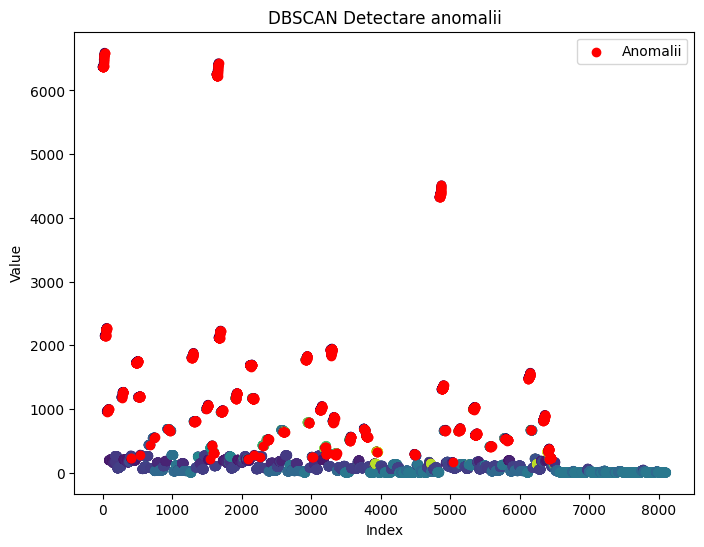

In [31]:
###Detectarea anomaliilor 


from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt

dtype_dict = {
    'Category': str,
    'Region': str,
    'Year': int,
    'Value': float
}

data = pd.read_csv('modified_dataset.csv',skiprows=1, names=['Category', 'Region', 'Year','Value'])

# Specify DBSCAN parameters
eps = 0.5  # Maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 5  # Minimum number of samples in a neighborhood for a point to be considered as a core point

# Initialize DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model to your data
dbscan.fit(data[['Value']])

# Extract cluster labels (-1 represents outliers)
cluster_labels = dbscan.labels_

# Identify anomalies (points with cluster label -1)
anomalies = data[cluster_labels == -1]

# Print or further analyze the anomalies
print("Anomalies:")
print(anomalies)

plt.figure(figsize=(8, 6))
plt.scatter(data.index, data['Value'], c=cluster_labels, cmap='viridis')
plt.scatter(anomalies.index, anomalies['Value'], color='red', label='Anomalii')
plt.title('DBSCAN Detectare anomalii')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()
total_data_points = len(data)

In [28]:
import pandas as pd

# Read the data from CSV file with custom column names
data = pd.read_csv('dataset_.csv', header=None, names=['Category', 'Region', 'Year', 'Unit', 'Value'])

# Drop the 'Custom_Unit' column
data = data.drop(columns=['Unit'])

# Save the modified DataFrame back to the CSV file
data.to_csv('modified_dataset.csv', index=False)

# Now 'Custom_Unit' column is removed from the DataFrame
print(data)

     Category Region  Year   Value
0       Total  TOTAL  1990  6371.0
1       Total  TOTAL  1991  6367.6
2       Total  TOTAL  1992  6368.2
3       Total  TOTAL  1993  6366.9
4       Total  TOTAL  1994  6369.0
...       ...    ...   ...     ...
8106   Others  Timis  2015     1.9
8107   Others  Timis  2016     1.9
8108   Others  Timis  2017     1.9
8109   Others  Timis  2018     1.9
8110   Others  Timis  2019     2.0

[8111 rows x 4 columns]


In [ ]:
import subprocess

# Function to execute Git commands
def git_command(*args):
    """
    Execute Git command.
    Args:
        *args: Git command and its arguments
    Returns:
        Output of the Git command
    """
    try:
        result = subprocess.run(['git'] + list(args), capture_output=True, text=True, check=True)
        return result.stdout.strip()
    except subprocess.CalledProcessError as e:
        print(f"Error: {e.stderr}")
        return None

# Example usage
repo_path = 'D:\machine_learning\Forest-Surfaces-in-Romania-1990-2019'
git_command('init', repo_path)  # Initialize a new Git repository
git_command('add', '.')         # Stage all changes
git_command('commit', '-m', 'Initial commit')  # Commit changes